##Import Library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')


## Import Dataset

In [ ]:
!gdown --id 1rjGu8Otkz2Sa0wRX_AWnAJk7QqJs4mmB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rjGu8Otkz2Sa0wRX_AWnAJk7QqJs4mmB
To: /content/amazon_reviews.csv
100% 1.60M/1.60M [00:00<00:00, 12.1MB/s]


In [ ]:
df = pd.read_csv('amazon_reviews.csv')
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


## Preprocessing

In [ ]:
# Select Only Review Text Column
review = df[['reviewText']]
review

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


### Cleaning Data

In [ ]:
import re
import string
import pandas as pd
def cleaningText(text):
  if isinstance(text, str):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
  return text

review['review_clean'] = review['reviewText'].apply(cleaningText)
review

,reviewText,review_clean
0,No issues.,No issues
1,"Purchased this for my device, it worked as adv...",Purchased this for my device it worked as adve...
2,it works as expected. I should have sprung for...,it works as expected I should have sprung for ...
3,This think has worked out great.Had a diff. br...,This think has worked out greatHad a diff bran...
4,"Bought it with Retail Packaging, arrived legit...",Bought it with Retail Packaging arrived legit ...
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,I bought this Sandisk GB Class to use with my...
4911,Used this for extending the capabilities of my...,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...,Great card that is very fast and reliable It c...
4913,Good amount of space for the stuff I want to d...,Good amount of space for the stuff I want to d...


### Case Folding

In [ ]:
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

review['review_clean'].fillna('', inplace=True)  # Mengganti NaN dengan string kosong
review['review_clean'] = review['review_clean'].astype(str)  # Memastikan bahwa semua nilai adalah string
review['casefolding'] = review['review_clean'].apply(casefoldingText)

### Tokenize

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

review['tokens'] = review['casefolding'].apply(tokenizingText)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Remove Stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('english'))
    listStopwords.update(listStopwords)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
review['stopword'] = review['tokens'].apply(filteringText)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# from nltk.stem import SnowballStemmer
# stemmer = SnowballStemmer("english")

# # Create Stemmer Function
# def word_stemmer(text):
#     stem_text = [stemmer.stem(i) for i in text]
#     return stem_text

# # Apply to the dataframe
# review['review_stemming'] = review['review_stopword'].apply(lambda x: word_stemmer(x))
# review

### Merge to sentence

In [ ]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

review['review_akhir'] = review['stopword'].apply(toSentence)
review

,reviewText,review_clean,casefolding,tokens,stopword,review_akhir
0,No issues.,No issues,no issues,"[no, issues]",[issues],issues
1,"Purchased this for my device, it worked as adv...",Purchased this for my device it worked as adve...,purchased this for my device it worked as adve...,"[purchased, this, for, my, device, it, worked,...","[purchased, device, worked, advertised, never,...",purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,it works as expected I should have sprung for ...,it works as expected i should have sprung for ...,"[it, works, as, expected, i, should, have, spr...","[works, expected, sprung, higher, capacity, th...",works expected sprung higher capacity think ma...
3,This think has worked out great.Had a diff. br...,This think has worked out greatHad a diff bran...,this think has worked out greathad a diff bran...,"[this, think, has, worked, out, greathad, a, d...","[think, worked, greathad, diff, bran, gb, card...",think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",Bought it with Retail Packaging arrived legit ...,bought it with retail packaging arrived legit ...,"[bought, it, with, retail, packaging, arrived,...","[bought, retail, packaging, arrived, legit, or...",bought retail packaging arrived legit orange e...
...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,I bought this Sandisk GB Class to use with my...,i bought this sandisk gb class to use with my...,"[i, bought, this, sandisk, gb, class, to, use,...","[bought, sandisk, gb, class, use, htc, inspire...",bought sandisk gb class use htc inspire months...
4911,Used this for extending the capabilities of my...,Used this for extending the capabilities of my...,used this for extending the capabilities of my...,"[used, this, for, extending, the, capabilities...","[used, extending, capabilities, samsung, galax...",used extending capabilities samsung galaxy not...
4912,Great card that is very fast and reliable. It ...,Great card that is very fast and reliable It c...,great card that is very fast and reliable it c...,"[great, card, that, is, very, fast, and, relia...","[great, card, fast, reliable, comes, optional,...",great card fast reliable comes optional adapte...
4913,Good amount of space for the stuff I want to d...,Good amount of space for the stuff I want to d...,good amount of space for the stuff i want to d...,"[good, amount, of, space, for, the, stuff, i, ...","[good, amount, space, stuff, want, fits, gopro...",good amount space stuff want fits gopro say


In [ ]:
# Check for missing values
print('Missing values:\n', review.isnull().sum())

Missing values:
 reviewText      1
review_clean    0
casefolding     0
tokens          0
stopword        0
review_akhir    0
dtype: int64


In [ ]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of review
def sentiment_analysis_lexicon(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    # else:
    #     polarity = 'neutral'
    return score, polarity

In [ ]:
results = review['stopword'].apply(sentiment_analysis_lexicon)
results = list(zip(*results))
review['polarity_score'] = results[0]
review['polarity'] = results[1]
print(review['polarity'].value_counts())

# Export to csv file

positive    4438
negative     477
Name: polarity, dtype: int64


In [ ]:
review

,reviewText,review_clean,casefolding,tokens,stopword,review_akhir,polarity_score,polarity
0,No issues.,No issues,no issues,"[no, issues]",[issues],issues,0,positive
1,"Purchased this for my device, it worked as adv...",Purchased this for my device it worked as adve...,purchased this for my device it worked as adve...,"[purchased, this, for, my, device, it, worked,...","[purchased, device, worked, advertised, never,...",purchased device worked advertised never much ...,0,positive
2,it works as expected. I should have sprung for...,it works as expected I should have sprung for ...,it works as expected i should have sprung for ...,"[it, works, as, expected, i, should, have, spr...","[works, expected, sprung, higher, capacity, th...",works expected sprung higher capacity think ma...,2,positive
3,This think has worked out great.Had a diff. br...,This think has worked out greatHad a diff bran...,this think has worked out greathad a diff bran...,"[this, think, has, worked, out, greathad, a, d...","[think, worked, greathad, diff, bran, gb, card...",think worked greathad diff bran gb card went s...,0,positive
4,"Bought it with Retail Packaging, arrived legit...",Bought it with Retail Packaging arrived legit ...,bought it with retail packaging arrived legit ...,"[bought, it, with, retail, packaging, arrived,...","[bought, retail, packaging, arrived, legit, or...",bought retail packaging arrived legit orange e...,3,positive
...,...,...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,I bought this Sandisk GB Class to use with my...,i bought this sandisk gb class to use with my...,"[i, bought, this, sandisk, gb, class, to, use,...","[bought, sandisk, gb, class, use, htc, inspire...",bought sandisk gb class use htc inspire months...,-2,negative
4911,Used this for extending the capabilities of my...,Used this for extending the capabilities of my...,used this for extending the capabilities of my...,"[used, this, for, extending, the, capabilities...","[used, extending, capabilities, samsung, galax...",used extending capabilities samsung galaxy not...,1,positive
4912,Great card that is very fast and reliable. It ...,Great card that is very fast and reliable It c...,great card that is very fast and reliable it c...,"[great, card, that, is, very, fast, and, relia...","[great, card, fast, reliable, comes, optional,...",great card fast reliable comes optional adapte...,6,positive
4913,Good amount of space for the stuff I want to d...,Good amount of space for the stuff I want to d...,good amount of space for the stuff i want to d...,"[good, amount, of, space, for, the, stuff, i, ...","[good, amount, space, stuff, want, fits, gopro...",good amount space stuff want fits gopro say,3,positive


In [ ]:
review.to_csv('review.csv', index=False)

## Visualize


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

### Annual Review Contributions

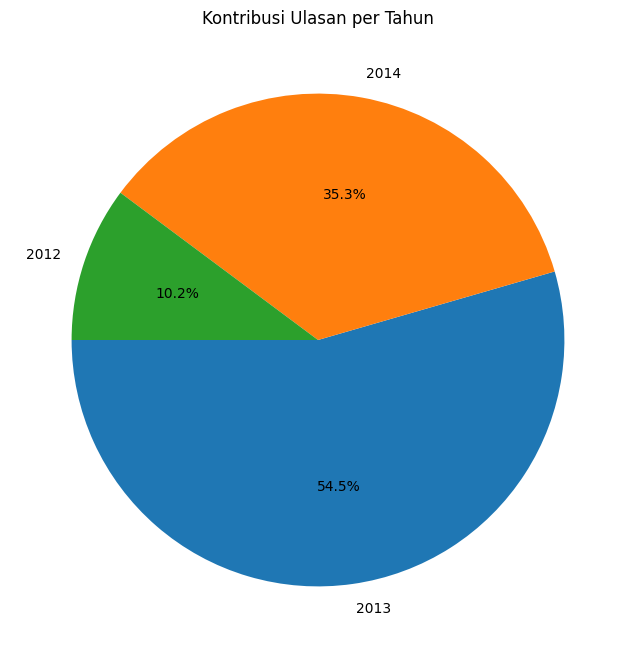

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Hitung jumlah ulasan per tahun
review_counts = df['reviewTime'].dt.year.value_counts()
labels = review_counts.index

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Kontribusi Ulasan per Tahun')

plt.show()

### Number of Reviews by Rating

In [ ]:
#  Shape of the dataset, and breakdown of the classes
df = df.rename(columns={'overall': 'rating'})
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 4915 rows and 12 columns
rating 1.0 = 244 rows
rating 2.0 = 80 rows
rating 3.0 = 142 rows
rating 4.0 = 527 rows
rating 5.0 = 3922 rows


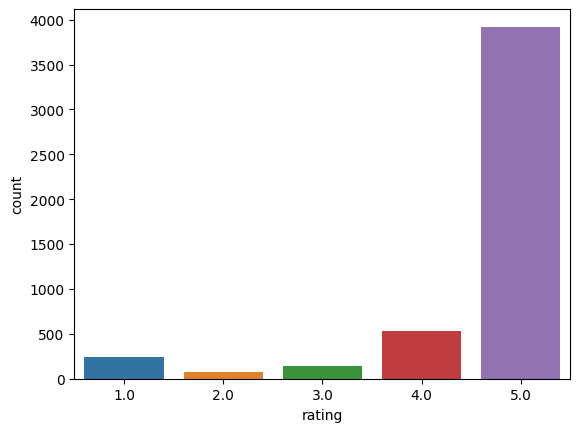

In [ ]:
# Missing values in the dataset
# print(f"Number of null in label: { df['Rating'].isnull().sum() }")
# print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

### Text Length Distribution

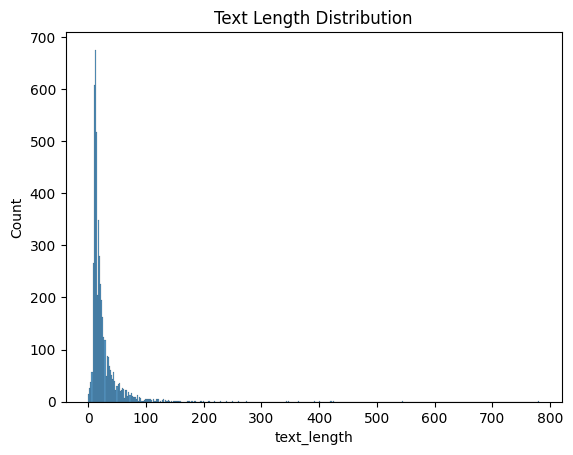

In [ ]:
# Visualize text length distribution
review['text_length'] = review['review_akhir'].apply(lambda x: len(x.split()))
sns.histplot(review['text_length'])
plt.title('Text Length Distribution')
plt.show()

### Most Frequent Words

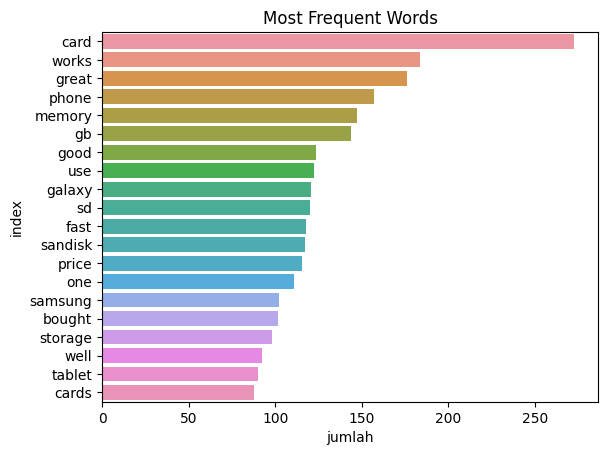

In [ ]:
# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(review['review_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

### Distribution Class Polarity Review

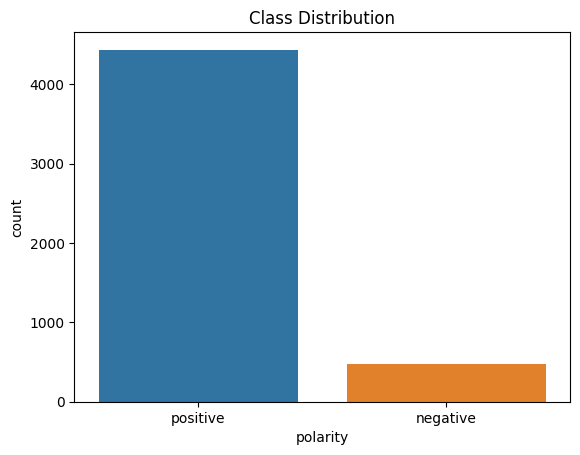

positive    4438
negative     477
Name: polarity, dtype: int64


In [ ]:
sns.countplot(x='polarity', data=review)
plt.title('Class Distribution')
plt.show()

polarity_counts = review['polarity'].value_counts()
print(polarity_counts)

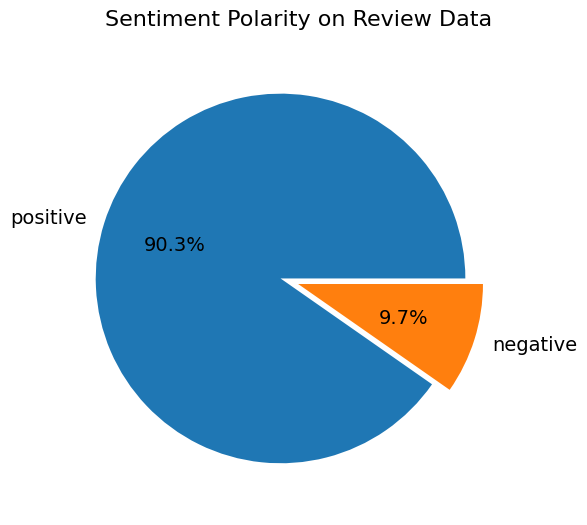

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in review['polarity'].value_counts()]
labels = list(review['polarity'].value_counts().index)
explode = (0.1, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize = 16, pad = 20)
plt.show()

### Word Cloud : Negative Review

In [ ]:
reviews_negatif = review[review['polarity'] == 'negative']['casefolding']
reviews_negatif

19      this works with the nl  no video stuttering li...
24      san disk is hard to beat  you will pay more fo...
32      i bought  of those sandisk  gb microsd  used t...
44      more like mbs in my note  and thats using sand...
47      this tiny marvel does what it claims  the only...
                              ...                        
4799    its a little more than sandisks slow gb micros...
4818    have been using this non stop for  months with...
4849    died within  months stopped being able to read...
4891    this was the fastest microsd card i have teste...
4910    i bought this sandisk gb class  to use with my...
Name: casefolding, Length: 477, dtype: object

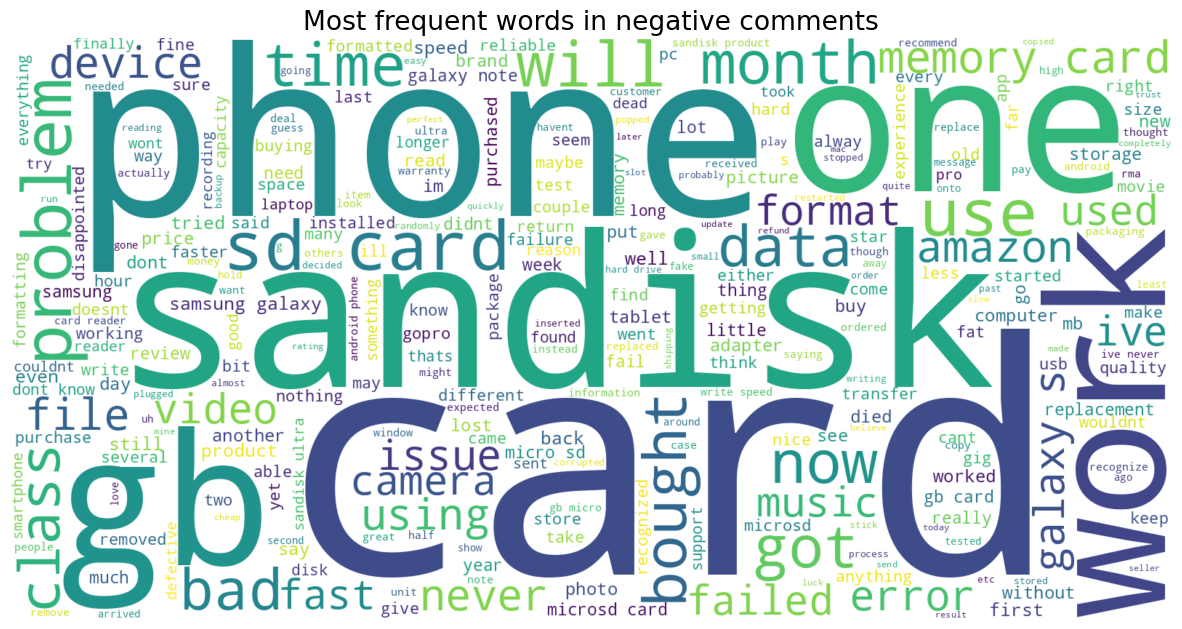

In [ ]:
text = ' '.join([word for word in reviews_negatif])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=300, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

### Word Cloud : Positive Review

In [ ]:
reviews_positif = review[review['polarity'] == 'positive']['casefolding']
reviews_positif

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4909    i bought this to stretch the capability of my ...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: casefolding, Length: 4438, dtype: object

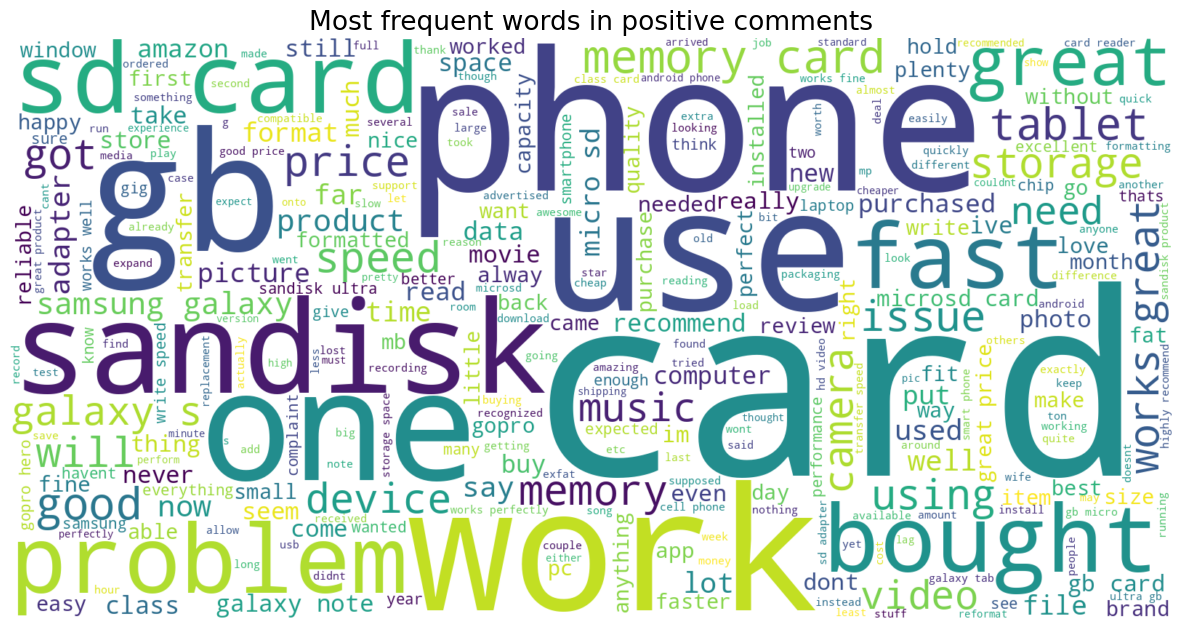

In [ ]:
text = ' '.join([word for word in reviews_positif])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=300, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
reviews_positif = reviews_positif[['review_akhir', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
reviews_positif.index += 1
reviews_positif[0:10]

In [ ]:
pd.set_option('display.max_colwidth', 3000)
reviews_negatif = reviews_negatif[['review_akhir', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
reviews_negatif.index += 1
reviews_negatif[0:20]

,review_akhir,polarity_score,polarity
1,bought wifes android phone failed months figured luck draw mine failed months losing bunch photos videos made sure back every weeks even lost bunch photos month newbornclearly sandisk bad batch lot return policy horrible wont buying sandisk matter cheap bought sale around january half price similar sd cards sandisk clearly knew bad batch shame dumping customer matter cheapwhile would presumed would solved problem production buy risk sandisk sell product ridiculous failure rateedit submitting review research sites low star reviews sandisk clearly guilty selling defective product batch months ago said put super discount sale knew thumbing nose customers fell outside warrantee like myselfto knowingly sell customer something going fail unacceptable rate ignore failed little bit outside warrantee bad faith beg people considering buying product thumb reviews warning failures companies lose sales reconsider screwing customers like thispersonally bought several sandisk thumb drives compactflash cards sandisk mp player thumb drives ok wouldnt buy another mp player buggy hell overall neutral favorable opinion anymoreif think overreacting please skim pages submitted springtime least one months failed reviews per page,-31,negative
2,bought card originally galaxy note ii intentions using primary downloader could get format correctly phone even using third party format softwarei tried galaxy tab plussame problemsi finally ridiculously put card nikon camera could take whopping k photos highlarge settings would ever need take many photos one session last option use cardit worked well taking photos holiday thankfully fail could get photos onto computer since inserted back camera reformatted like always bam one photo good failure every single time gb card capable taking storing one photo time must run fix file system computerdont waste money card priced really faster cards zero longevity may one think problem created proprietary format exfat makes card loser point poor customer buys itupdate july contacting sandisk offered rma first must verify tried recover wipe data card must ship expense taiwan since emailed reply requested information date purchase photos card packaging ect told data data could accessed card would wiped give information stored card makes less happy guessing want discourage returns would want send data company knowing access information contained would wiped card unreadable unable format unable anything send hoping information destroyed along bad cardsandisk asking whole lot customers since card gone bad several cards go bad well seems whole lot cards shipped die short time periods used love products older flash drives great still using micro cruzer years old going strong one single microsd card company last three months since moved philippines either send junk philippines dropped qc business model create higher profit marginsupdate emailing sandisk expressing displeasure return item intact assess card look atrecover ever personal information may stored card rescinded assume want get card back verify bad make sure trying get free card understand instead requiring send card back asked cut card send photo destroyed card could process new card sent directly philippines hammered pretty hard review email sent regarding bad card sometimes get results case give stars right thing problem cutting card since would operate devices anyway problem returning device intact knowing information stored card banking amazon account info passwords ect would kept card destroyed never bought another sandisk faith restoring gesture remove list companies avoid hope get better qc returned another defective card retailer yesterday find must original packaging replacement lucky still one packages since bought several cards sure gave matching package card returnedi would suggest like several devices dslrs galaxy tab galaxy note sii lgp find way mark cardpackage keep package case card go bad half sandisk gb cards f

## Ekstraksi fitur

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = review['review_akhir']
y = review['polarity']

In [ ]:
print(X.shape)
print(y.shape)

(4915,)
(4915,)


In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,able,adapter,also,always,amazon,android,another,anyone,anything,apps,...,windows,without,work,worked,working,works,worth,would,write,yet
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.324172,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.281864,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.191947,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.237381,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0.247134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.276128,0.0,0.0,0.0
4911,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4912,0.000000,0.232725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4913,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3932, 200)
(983, 200)
(3932,)
(983,)


## Modelling

### Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Latih model klasifikasi Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=3, solver='liblinear', max_iter=150)
lr.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=150, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred,y_test)
print('Test accuracy : {:.2f}%'.format(lr_acc*100))

Test accuracy : 91.66%


In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

    negative       0.83      0.16      0.27        94
    positive       0.92      1.00      0.96       889

    accuracy                           0.92       983
   macro avg       0.88      0.58      0.61       983
weighted avg       0.91      0.92      0.89       983



### Tuning Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Daftar parameter yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 250]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Melatih model dengan kombinasi parameter
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 3, 'max_iter': 250, 'solver': 'saga'}


In [ ]:
best_params = grid_search.best_params_
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train, y_train)
best_lr_pred = best_lr.predict(X_test)
best_lr_acc = accuracy_score(best_lr_pred,y_test)
print('Test accuracy : {:.2f}%'.format(best_lr_acc*100))

Test accuracy : 91.66%


In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

    negative       0.83      0.16      0.27        94
    positive       0.92      1.00      0.96       889

    accuracy                           0.92       983
   macro avg       0.88      0.58      0.61       983
weighted avg       0.91      0.92      0.89       983



In [ ]:
x_test_ = tfidf.inverse_transform(X_test)

In [ ]:
df_lr = pd.DataFrame({
    'Data Test': x_test_,
    'True Label': y_test,
    'Hasil Prediksi': best_lr_pred
})

df_lr

,Data Test,True Label,Hasil Prediksi
2804,"[problems, micro, far, class, great, sd]",positive,positive
1272,"[issue, find, samsung, using, easy, galaxy, phone]",positive,positive
4629,"[thing, speeds, read, write, mbs, good]",positive,positive
3501,"[buying, really, microsdhc, say, small, fast, much]",positive,positive
957,"[deal, problems, formatted, microsd, data, good, months, gb, phone]",positive,positive
...,...,...,...
1546,"[found, find, even, thing, time, im, micro, got, class, great, sd, get, price, best, cards, card, gb]",positive,positive
3285,"[pc, need, put, use, adapter, want, else, sd, price, one]",positive,positive
4220,"[gopro, quick, issue, see, seems, bad, first, sure, going, formatted, always, im, also, another, samsung, got, problem, havent, used, adapter, still, galaxy, good, extra, files, great, would, sandisk, sd, working, cards, bought, months, ive, well, pretty, one, card, gb, works, since, phone, never, worked, issues]",negative,positive
4826,"[windows, put, micro, easy, got, came, great, tablet, sd, quickly, packaging, memory, worked, purchased]",positive,positive


In [ ]:
# Menghitung TP, TN, FP, FN
TP_lr = ((df_lr['True Label'] == 'positive') & (df_lr['Hasil Prediksi'] == 'positive')).sum()
TN_lr = ((df_lr['True Label'] == 'negative') & (df_lr['Hasil Prediksi'] == 'negative')).sum()
FP_lr = ((df_lr['True Label'] == 'positive') & (df_lr['Hasil Prediksi'] == 'negative')).sum()
FN_lr = ((df_lr['True Label'] == 'negative') & (df_lr['Hasil Prediksi'] == 'positive')).sum()
print('true positive =', TP_lr)
print('true negative =', TN_lr)
print('False positive =', FP_lr)
print('False negative =', FN_lr)

true positive = 886
true negative = 15
False positive = 3
False negative = 79


In [ ]:
# Menghitung jumlah positif dan negatif
asli_positif_lr = ((df_lr['True Label'] == 'positive')).sum()
asli_negatif_lr = ((df_lr['True Label'] == 'negative')).sum()
pred_positif_lr = ((df_lr['Hasil Prediksi'] == 'positive')).sum()
pred_negatif_lr = ((df_lr['Hasil Prediksi'] == 'negative')).sum()
print('asli_positif =', asli_positif_lr)
print('asli_negatif =', asli_negatif_lr)
print('pred_positif =', pred_positif_lr)
print('pred_negatif =', pred_negatif_lr)

asli_positif = 889
asli_negatif = 94
pred_positif = 965
pred_negatif = 18


### Tuning Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, X_test, y_train, y_test
# If not, you should split your data into training and testing sets first
# For example: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_params_rf = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)
best_rf_acc = accuracy_score(best_rf_pred,y_test)
print('Test accuracy : {:.2f}%'.format(best_rf_acc*100))

Test accuracy : 91.35%


In [ ]:
print(classification_report(y_test, best_rf_pred))

              precision    recall  f1-score   support

    negative       0.85      0.12      0.21        94
    positive       0.91      1.00      0.95       889

    accuracy                           0.91       983
   macro avg       0.88      0.56      0.58       983
weighted avg       0.91      0.91      0.88       983



In [ ]:
x_test_ = tfidf.inverse_transform(X_test)

In [ ]:
df_rf = pd.DataFrame({
    'Data Test': x_test_,
    'True Label': y_test,
    'Hasil Prediksi': best_rf_pred
})

df_rf

,Data Test,True Label,Hasil Prediksi
2804,"[problems, micro, far, class, great, sd]",positive,positive
1272,"[issue, find, samsung, using, easy, galaxy, phone]",positive,positive
4629,"[thing, speeds, read, write, mbs, good]",positive,positive
3501,"[buying, really, microsdhc, say, small, fast, much]",positive,positive
957,"[deal, problems, formatted, microsd, data, good, months, gb, phone]",positive,positive
...,...,...,...
1546,"[found, find, even, thing, time, im, micro, got, class, great, sd, get, price, best, cards, card, gb]",positive,positive
3285,"[pc, need, put, use, adapter, want, else, sd, price, one]",positive,positive
4220,"[gopro, quick, issue, see, seems, bad, first, sure, going, formatted, always, im, also, another, samsung, got, problem, havent, used, adapter, still, galaxy, good, extra, files, great, would, sandisk, sd, working, cards, bought, months, ive, well, pretty, one, card, gb, works, since, phone, never, worked, issues]",negative,positive
4826,"[windows, put, micro, easy, got, came, great, tablet, sd, quickly, packaging, memory, worked, purchased]",positive,positive


In [ ]:
# Menghitung TP, TN, FP, FN
TP_rf = ((df_rf['True Label'] == 'positive') & (df_rf['Hasil Prediksi'] == 'positive')).sum()
TN_rf = ((df_rf['True Label'] == 'negative') & (df_rf['Hasil Prediksi'] == 'negative')).sum()
FP_rf = ((df_rf['True Label'] == 'positive') & (df_rf['Hasil Prediksi'] == 'negative')).sum()
FN_rf = ((df_rf['True Label'] == 'negative') & (df_rf['Hasil Prediksi'] == 'positive')).sum()
print('true positive =', TP_rf)
print('true negative =', TN_rf)
print('False positive =', FP_rf)
print('False negative =', FN_rf)

true positive = 887
true negative = 11
False positive = 2
False negative = 83


In [ ]:
# Menghitung jumlah positif dan negatif
asli_positif_rf = ((df_rf['True Label'] == 'positive')).sum()
asli_negatif_rf = ((df_rf['True Label'] == 'negative')).sum()
pred_positif_rf = ((df_rf['Hasil Prediksi'] == 'positive')).sum()
pred_negatif_rf = ((df_rf['Hasil Prediksi'] == 'negative')).sum()
print('asli_positif =', asli_positif_rf)
print('asli_negatif =', asli_negatif_rf)
print('pred_positif =', pred_positif_rf)
print('pred_negatif =', pred_negatif_rf)

asli_positif = 889
asli_negatif = 94
pred_positif = 970
pred_negatif = 13


## Prediction

In [ ]:
def preprocessing_lengkap(text):
  text = cleaningText(text)
  text = casefoldingText(text)
  text = tokenizingText(text)
  text = filteringText(text)
  text = toSentence(text)
  return text

**Examples POSITIVE Review**

It can take games with large files very easily and still have enough space for apps.

I am extremely satisfied with the performance of this smartphone! The display is clear, the camera produces sharp photos, and the battery life is impressive. Highly recommend!

This laptop is incredibly fast and lightweight. The battery life is impressive, and the screen is high quality. I use this for everyday work, and it has never disappointed.

**Examples NEGATIVE Review**

Had it in my samsung tablet and it went bad after 2 months, wont let me reformat or read it or do anything with it. money down the drain.

The battery drains quickly, and I often experience lag. I am not satisfied with the camera; the photo results are not sharp. It might not be worth the price.

This laptop frequently experiences hang-ups, especially when running heavy applications. The laptop also tends to get hot. Not satisfied with overall performance.

### LR Prediction

In [ ]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_lr.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Masukkan kalimat review = It can take games with large files very easily and still have enough space for apps. 
Sentimen:  positive


In [ ]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_lr.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Masukkan kalimat review = had it in my samsung tablet and it went bad after 2 months, wont let me reformat or read it or do anything with it. money down the drain.
Sentimen:  negative


### RF Prediction

In [ ]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_rf.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Masukkan kalimat review = It can take games with large files very easily and still have enough space for apps.
Sentimen:  positive


In [ ]:
text = input("Masukkan kalimat review = ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = best_rf.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

Masukkan kalimat review = Had it in my samsung tablet and it went bad after 2 months, wont let me reformat or read it or do anything with it. money down the drain.
Sentimen:  negative


In [ ]:
import pickle

# Save TF-IDF vectorizer
with open("tfidf_model.pkl", "wb") as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

# Save Logistic Regression model
with open("lr_model.pkl", "wb") as lr_file:
    pickle.dump(best_lr, lr_file)

# Save Random Forest model
with open("rf_model.pkl", "wb") as rf_file:
    pickle.dump(best_rf, rf_file)

In [ ]:
from google.colab import files

files.download('tfidf_model.pkl')
files.download('lr_model.pkl')
files.download('lr_model.pkl')